## Users Dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Load the users dataset
users = pd.read_csv("USER_TAKEHOME.csv")
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [3]:
# Check the data shape and info
print('users data shape: ', users.shape)
print(users.info())
print("---------------------------------------------------------------")
print(users.describe(include='all').transpose())

users data shape:  (100000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB
None
---------------------------------------------------------------
               count  unique                        top   freq
ID            100000  100000   5ef3b4f17053ab141787697d      1
CREATED_DATE  100000   99942  2023-01-12 18:30:15.000 Z      2
BIRTH_DATE     96325   54721  1970-01-01 00:00:00.000 Z   1272
STATE          95188      52                         TX   9028
LANGUAGE       69492       2                         en  63403
GENDER         94108      11 

In [4]:
# Data types transforming: CREATED_DATE and BIRTH_DATE columns, transforming to datetime
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE']).dt.tz_convert(None)
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE']).dt.tz_convert(None)

In [5]:
# Check duplicates
users.duplicated().sum()

0

In [6]:
# Check the missing data and % population of each column
users_stats = pd.DataFrame(users.count(), columns=['count'])
users_stats['missing'] = users.isnull().sum()
users_stats['% pop'] = 1 - users_stats['missing'] / users.shape[0]
users_stats

,count,missing,% pop
ID,100000,0,1.00000
CREATED_DATE,100000,0,1.00000
BIRTH_DATE,96325,3675,0.96325
STATE,95188,4812,0.95188
LANGUAGE,69492,30508,0.69492
GENDER,94108,5892,0.94108


The Users dataframe does not contain any duplicated rows. However, there are missing values in the following columns:

- `LANGUAGE`: 30.5% missing values
- `GENDER`: 5.9% missing values
- `STATE`: 4.8% missing values
- `BIRTH_DATE`: 3.7% missing values

In [7]:
# Create the age column to check gaps or irregularities in time
users["AGE"] = (users["CREATED_DATE"] - users["BIRTH_DATE"]).dt.days // 365

In [8]:
# Separate the columns into numeric and categorical
numeric = ["CREATED_DATE", "BIRTH_DATE", "AGE"]
categorical = ["ID", "STATE", "LANGUAGE", "GENDER"]

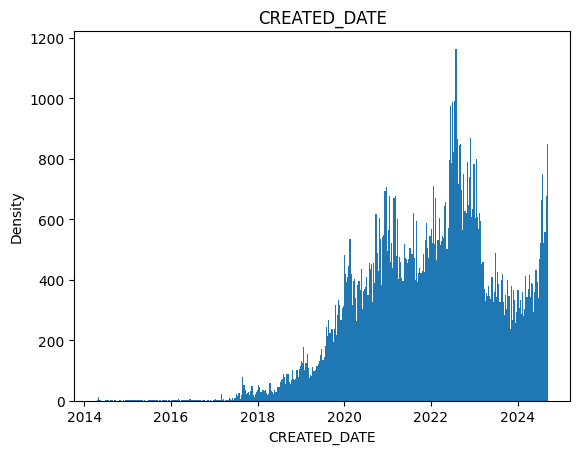

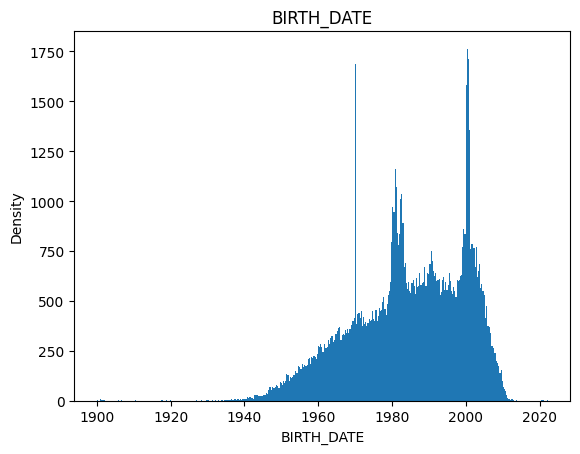

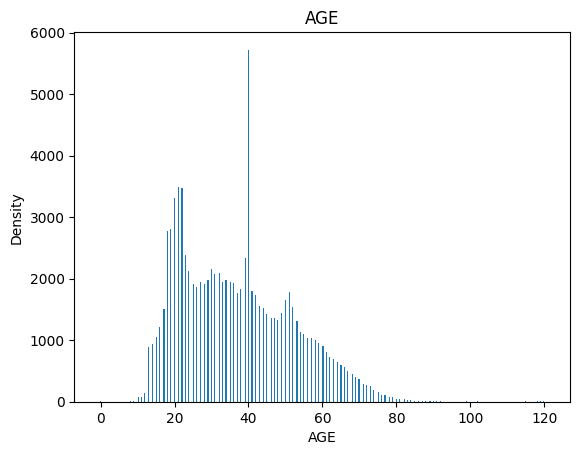

In [9]:
# Plot numeric distributions
for col in numeric:
    plt.hist(users[col],bins=400)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(col)
    plt.show()

The `BIRTH_DATE` and `AGE` columns exhibit unusual peaks around the year 1970 and the age of 40, respectively. It is needed a deeper investigation into these columns to understand the cause.

#### `BIRTH_DATE` column

In [9]:
# Check the BIRTH_DATE column distribution
print(users["BIRTH_DATE"].describe())
users["BIRTH_DATE"].value_counts(dropna=False)

count                            96325
mean     1984-09-02 02:39:04.710417920
min                1900-01-01 00:00:00
25%                1974-03-04 00:00:00
50%                1985-10-25 00:00:00
75%                1998-02-02 05:00:00
max                2022-04-03 07:00:00
Name: BIRTH_DATE, dtype: object


BIRTH_DATE
NaT                    3675
1970-01-01 00:00:00    1272
1979-12-11 08:00:00      63
2000-12-12 00:00:00      28
2000-12-31 00:00:00      23
                       ... 
2004-02-21 08:00:00       1
1956-02-09 05:00:00       1
1974-07-13 00:00:00       1
1991-05-23 04:00:00       1
1995-06-09 04:00:00       1
Name: count, Length: 54722, dtype: int64

In [10]:
# There are some BIRTH_DATE has value in hours, minutes or seconds, which might be incorrect. Check those values
birthdate_withtime = users[((users["BIRTH_DATE"].dt.hour != 0) | (users["BIRTH_DATE"].dt.minute != 0) | (users["BIRTH_DATE"].dt.second != 0)) & (users["BIRTH_DATE"].notnull())]
birthdate_withtime

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55,2001-09-24 04:00:00,PA,en,female,19.0
5,5fe2b6f3ad416a1265c4ab68,2020-12-23 03:18:11,1999-10-27 04:00:00,NY,en,female,21.0
6,651210546816bb4d035b1ead,2023-09-25 22:57:24,1983-09-25 22:57:25,FL,es-419,male,40.0
7,642831ea3d4434e63c1936fd,2023-04-01 13:30:18,1970-02-16 05:00:00,IN,en,female,53.0
8,63a4c9a1b5f32149b9d82f9e,2022-12-22 21:18:25,1982-12-22 05:00:00,NC,en,female,40.0
...,...,...,...,...,...,...,...
99994,6003677484d55512b4046f64,2021-01-16 22:23:48,1992-02-14 05:00:00,PA,NaN,transgender,28.0
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12,1992-03-16 08:00:00,CA,en,female,29.0
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39,1993-09-23 05:00:00,MO,en,female,29.0
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04,1995-06-09 04:00:00,DE,en,female,25.0


In [11]:
# Calculate the % of BIRTH_DATE with hours, minutes or seconds
birthdate_withtime.shape[0]/(users["BIRTH_DATE"].count())

0.6190085647547365

There are 1,272 users with the birth date 1970-01-01, which is the epoch date in Unix time. This is likely a default value used for the `BIRTH_DATE` input field when no valid data is provided. **I recommend replacing these default values with `NaN` to reflect missing or unknown data.**

Additionally, over 60% of the `BIRTH_DATE` entries include time values (hours, minutes, and seconds), even though the app's registration form allows users to input only the year, month, and day. This discrepancy suggests a potential issue with the data collection or processing pipeline. **I recommend seeking clarification from the data provider to understand the root cause of this anomaly. For data cleaning, I suggest truncating the time component of the date to retain only the year, month, and day for consistency.**

### `AGE` column

In [12]:
# Check the AGE column distribution
print(users["AGE"].describe())
users["AGE"].value_counts(dropna=False)

count    96325.000000
mean        36.822133
std         15.180904
min         -1.000000
25%         23.000000
50%         36.000000
75%         47.000000
max        121.000000
Name: AGE, dtype: float64


AGE
40.0     5721
NaN      3675
21.0     3489
22.0     3476
20.0     3311
         ... 
121.0       1
1.0         1
100.0       1
108.0       1
106.0       1
Name: count, Length: 119, dtype: int64

In [13]:
# The minimum value of AGE is negative, which is not possible. Check when CREATED_DATE is before BIRTH_DATE
users[users["CREATED_DATE"] < users["BIRTH_DATE"]]

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
41974,5f31fc048fa1e914d38d6952,2020-08-11 02:01:41,2020-10-02 15:27:28,CA,NaN,NaN,-1.0


In [14]:
# Check when age is > 100 (unusually high values)
users[users["AGE"] > 100].head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
3656,62be5974baa38d1a1f6b6725,2022-07-01 02:18:28,1903-01-01 05:00:00,PA,en,male,119.0
5878,60ac6acc79ed9200a6ebc24a,2021-05-25 03:11:08,1901-05-25 00:00:00,UT,NaN,female,120.0
6499,60a6e4af3369535cb6c4c89d,2021-05-20 22:37:35,1901-10-13 00:00:00,CA,NaN,male,119.0
11146,608601a7b14c7f309d219fc6,2021-04-25 23:56:23,1904-10-28 19:56:38,FL,es-419,female,116.0
14270,59bc4fd3e4b03f96c479b7e6,2017-09-15 22:10:27,1905-07-28 00:00:00,CA,en,female,112.0


In [15]:
# Check when age is < 10 (unusually low values)
users[users["AGE"] < 10].head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
2683,5fe2531a21684312580cb7d6,2020-12-22 20:12:10,2012-08-17 04:00:00,RI,NaN,male,8.0
8082,623e436fba45a13bb6518e62,2022-03-25 22:34:23,2012-07-14 04:00:00,PR,NaN,transgender,9.0
8204,5f0cee2074f3631470f1b942,2020-07-13 23:28:33,2015-07-13 04:00:00,KS,NaN,female,5.0
8866,6118be8750701854c8fd5a55,2021-08-15 07:13:11,2011-12-03 07:00:00,NV,NaN,female,9.0
10120,608e29c1ecd21937571e0d84,2021-05-02 04:25:37,2014-10-27 07:00:00,CA,NaN,female,6.0


In [16]:
# The most common age is 40, check the BIRTH_DATE distribution for this age
users[users["AGE"] == 40]["BIRTH_DATE"].value_counts(dropna=False)

BIRTH_DATE
1979-12-11 08:00:00    63
1980-10-10 04:00:00    12
1980-09-20 04:00:00     9
1980-12-13 05:00:00     8
1982-06-14 04:00:00     8
                       ..
1983-08-16 00:00:00     1
1981-01-02 06:00:00     1
1984-02-12 00:00:00     1
1982-03-05 05:00:00     1
1980-09-11 00:00:00     1
Name: count, Length: 3818, dtype: int64

In [17]:
# In the case of 40 years old, there are 63 users with the same birth date: 1979-12-11. Check the data
age_40_1979_12_11_check = users[(users["AGE"] == 40) & (users["BIRTH_DATE"].dt.date == dt.date(1979, 12, 11))]
age_40_1979_12_11_check

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
913,5df1bc5e71190b120d006b3c,2019-12-12 04:04:47,1979-12-11 08:00:00,KS,NaN,male,40.0
957,5df1ae4d71190b120dfaa9c6,2019-12-12 03:04:46,1979-12-11 08:00:00,KS,NaN,male,40.0
1402,5df1c56371190b120d043bfe,2019-12-12 04:43:16,1979-12-11 08:00:00,KS,NaN,male,40.0
2214,5df1b08671190b120dfb791d,2019-12-12 03:14:14,1979-12-11 08:00:00,KS,NaN,male,40.0
2617,5df1aa9c73dd29121561707c,2019-12-12 02:49:00,1979-12-11 08:00:00,KS,NaN,male,40.0
...,...,...,...,...,...,...,...
90001,5df1a7da9549bd11d38c2b40,2019-12-12 02:37:14,1979-12-11 08:00:00,KS,NaN,male,40.0
94245,5df1aaebf8defb1201b0fb75,2019-12-12 02:50:20,1979-12-11 08:00:00,KS,NaN,male,40.0
96389,5df1a678e7454812d28dccb7,2019-12-12 02:31:21,1979-12-11 08:00:00,KS,NaN,male,40.0
96750,5df1ba3f71190b120dffaa0b,2019-12-12 03:55:43,1979-12-11 08:00:00,KS,NaN,male,40.0


In [18]:
# The data is homogeneous, further check the distribution of STATE, LANGUAGE, and GENDER
age_40_1979_12_11_check[["STATE", "LANGUAGE", "GENDER"]].describe()

# --> All 63 users have same STATE, LANGUAGE, and GENDER values.

,STATE,LANGUAGE,GENDER
count,63,0,63
unique,1,0,1
top,KS,NaN,male
freq,63,NaN,63


In [19]:
# Check the CREATED_DATE distribution
age_40_1979_12_11_check["CREATED_DATE"].dt.date.value_counts()

# --> All 63 user accounts were created on the same day: 2019-12-12

CREATED_DATE
2019-12-12    63
Name: count, dtype: int64

The `AGE` column displays anomalies, including the following:

1. One entry has `CREATED_DATE` before `BIRTH_DATE`
2. Unusually low or high values: There are instances of ages below 10 and above 100, which are likely due to data entry errors or outliers.

    - **To ensure data accuracy, I suggest applying the following assumptions during cleaning:**
        - Minimum age: 13, in alignment with regulations like COPPA for online platforms.
        - Maximum age: 100, as ages exceeding this are likely erroneous in most datasets.

2. Duplicate user records: At the age of 40, there are 63 users with the same birth date, 1979-12-12. Further investigation revealed that these users were all created on the same day, 2019-12-12, and share identical values for `STATE`, `LANGUAGE`, and `GENDER`. This indicates that the users were likely created in bulk. **I recommend removing these redundant records and retaining only one representative record for this user.**

### `CREATED_DATE` column

In [20]:
# Check the CREATED_DATE column distribution
print(users["CREATED_DATE"].describe())
users["CREATED_DATE"].value_counts(dropna=False)

count                           100000
mean     2022-01-07 05:31:20.864859648
min                2014-04-18 23:14:55
25%                2020-12-01 21:16:19
50%                2022-03-07 01:03:37
75%         2023-01-30 13:47:44.500000
max                2024-09-11 17:59:15
Name: CREATED_DATE, dtype: object


CREATED_DATE
2023-01-12 18:30:15    2
2019-08-28 02:21:44    2
2024-04-11 02:56:41    2
2024-03-11 17:03:02    2
2024-02-25 20:43:59    2
                      ..
2024-08-25 03:30:41    1
2021-03-12 13:08:04    1
2024-07-24 19:33:12    1
2020-12-01 05:25:08    1
2020-03-25 01:30:30    1
Name: count, Length: 99942, dtype: int64

In [21]:
# Check when CREATED_DATE is after today, which is not possible
users[users["CREATED_DATE"] > dt.datetime.now()]

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE


In [22]:
# Check the duplicated CREATED_DATE
duplicate_created_date = users[users["CREATED_DATE"].duplicated(keep=False)].sort_values("CREATED_DATE")
duplicate_created_date

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
56335,5d61ec231ddc4058bd9a6233,2019-08-25 02:02:11,1972-06-07 00:00:00,VA,NaN,female,47.0
38211,5d61ec22fe79a7584c9b573c,2019-08-25 02:02:11,1975-08-12 05:00:00,AR,NaN,female,44.0
30543,5d65e5381ddc403b76f4dc72,2019-08-28 02:21:44,1975-05-15 00:00:00,NH,NaN,transgender,44.0
64789,5d65e537d09cf73c7b6a1585,2019-08-28 02:21:44,1990-10-15 05:00:00,MS,NaN,male,28.0
62448,5e153376128c2c120e86e57f,2020-01-08 01:42:14,1979-02-07 05:00:00,CT,NaN,female,40.0
...,...,...,...,...,...,...,...
30905,66e1d4eb7d6591145d46b11e,2024-09-11 17:35:39,2006-04-25 04:00:00,FL,NaN,female,18.0
16988,66e1d6727d6591145d46b16b,2024-09-11 17:42:10,2003-08-22 04:00:00,GA,NaN,prefer_not_to_say,21.0
30906,66e1d67287b8a35761d49a63,2024-09-11 17:42:10,1972-04-26 00:00:00,CA,NaN,female,52.0
48515,66e1d82a7d6591145d46b1ca,2024-09-11 17:49:30,1998-11-30 05:00:00,VA,NaN,female,25.0


In [23]:
# Check if the same CREATED_DATE has different values in other columns
check_duplicate = duplicate_created_date.groupby("CREATED_DATE").nunique()
check_duplicate.head()

,ID,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
CREATED_DATE,,,,,,
2019-08-25 02:02:11,2,2,2,0,1,2
2019-08-28 02:21:44,2,2,2,0,2,2
2020-01-08 01:42:14,2,2,1,0,1,2
2020-02-16 17:04:11,2,2,2,1,1,2
2020-04-29 02:24:48,2,2,2,1,1,2


In [24]:
# Check the duplicated rows where all columns have only 1 unique value
check_duplicate[(check_duplicate["BIRTH_DATE"] == 1) & (check_duplicate["STATE"] == 1) & (check_duplicate["LANGUAGE"] == 1) & (check_duplicate["GENDER"] == 1) & (check_duplicate["AGE"] == 1)]

,ID,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
CREATED_DATE,,,,,,
2023-10-21 22:29:47,2,1,1,1,1,1


In [25]:
# Look at the data that has the same CREATED_DATE and 1 unique value in all columns
users[users["CREATED_DATE"] == "2023-10-21 22:29:47"]

# --> One record has most of the columns as NaN, we can consider dropping this record if needed.

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
3841,653450dba65d634c1c2a2679,2023-10-21 22:29:47,NaT,NaN,en,NaN,NaN
41633,653450dba65d634c1c2a2678,2023-10-21 22:29:47,2003-10-24 22:29:49,MA,en,female,20.0


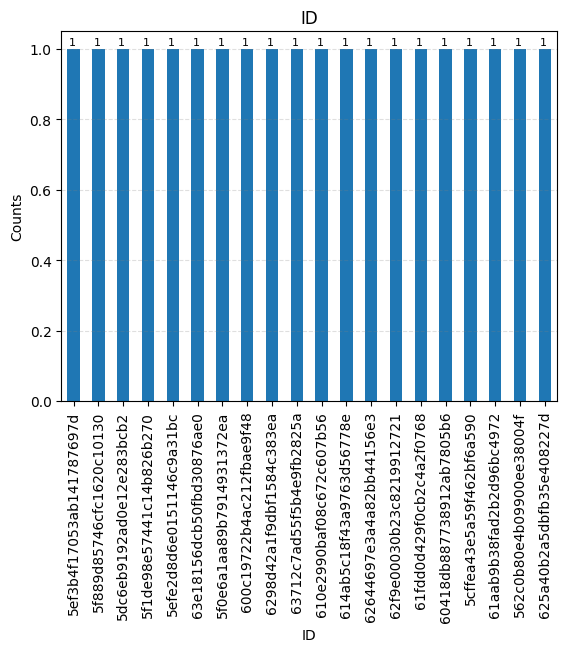

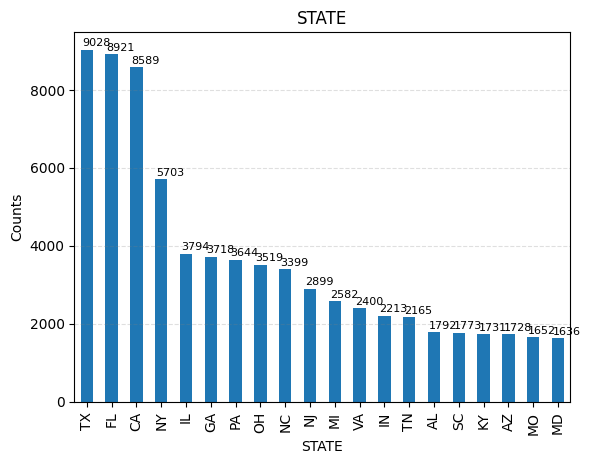

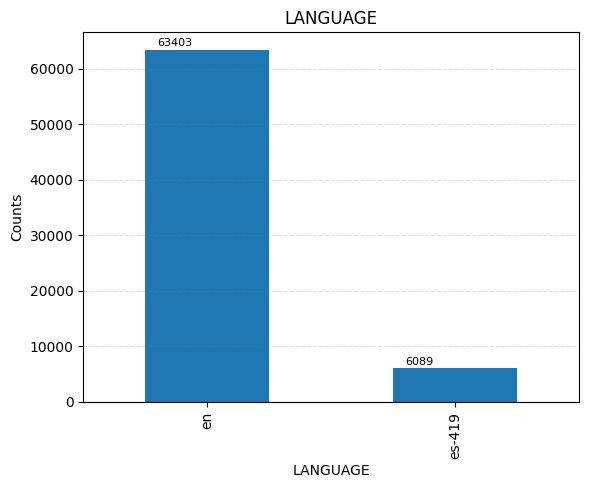

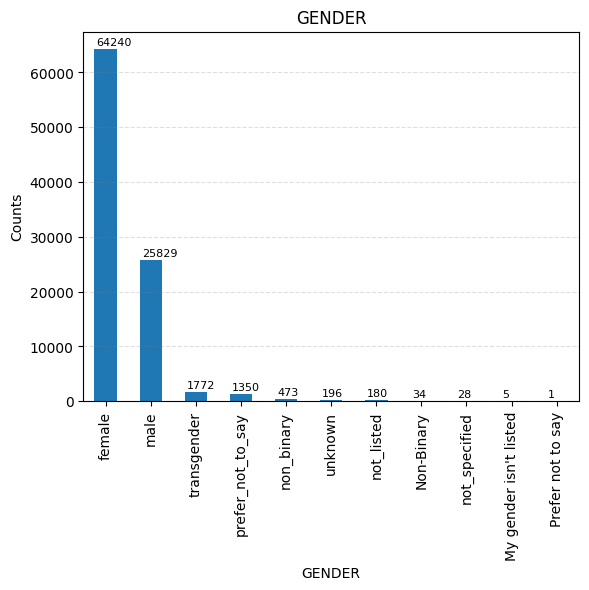

In [26]:
# plot categorical histograms
for col in categorical:
    counts = users[col].value_counts().head(20)
    ax = counts.plot(kind='bar')
    for i, v in enumerate(counts):
        ax.text(i - 0.2, v + counts.max()*0.01, str(v), color='black', fontsize=8)

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Counts')
    ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
    plt.show()

### `GENDER` column

In [27]:
# Check the GENDER column distribution
print(users["GENDER"].describe())
users["GENDER"].value_counts(dropna=False)

count      94108
unique        11
top       female
freq       64240
Name: GENDER, dtype: object


GENDER
female                    64240
male                      25829
NaN                        5892
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64

The `GENDER` column contains inconsistent labeling of categories, such as "non_binary" vs. "Non-Binary" and "not_listed" vs. "My gender isn't listed," which may lead to misrepresentation of the gender data. **I recommend standardizing the labels to improve clarity and accuracy.**

In [28]:
# Data Cleaning
# Standardize the labels
users['GENDER'] = users['GENDER'].replace("My gender isn't listed", "not_listed")
users['GENDER'] = users['GENDER'].replace("Prefer not to say", "prefer_not_to_say")
users['GENDER'] = users['GENDER'].replace("Non-Binary", "non_binary")

In [29]:
# calculate the frequency of each level in the column
freq_gender = 100*(users["GENDER"].value_counts(dropna=False)/len(users["GENDER"]))
print(freq_gender.map("{:.2f}%".format))

GENDER
female               64.24%
male                 25.83%
NaN                   5.89%
transgender           1.77%
prefer_not_to_say     1.35%
non_binary            0.51%
unknown               0.20%
not_listed            0.18%
not_specified         0.03%
Name: count, dtype: object


The dataset shows a dominant gender of female, which may introduce bias and affect the validity of future analyses. Further decision-making is needed on how to address this bias.

### `ID` column

In [30]:
# Check the ID column distribution
print(users["ID"].describe())
users["ID"].value_counts(dropna=False)

count                       100000
unique                      100000
top       5ef3b4f17053ab141787697d
freq                             1
Name: ID, dtype: object


ID
5ef3b4f17053ab141787697d    1
5f889d85746cfc1620c10130    1
5dc6eb9192ad0e12e283bcb2    1
5f1de98e57441c14b826b270    1
5efe2d8d6e0151146c9a31bc    1
                           ..
66caa561ceb005043d74acf3    1
604b67b40134cc12de1361fb    1
66a156f8465f309038b30946    1
5fc5d3b4a071f3282e52f0c6    1
5e7ab436905e9512ff44abc8    1
Name: count, Length: 100000, dtype: int64

### `STATE` column

In [31]:
# Check the STATE column distribution
print(users["STATE"].describe())
users["STATE"].value_counts(dropna=False)

count     95188
unique       52
top          TX
freq       9028
Name: STATE, dtype: object


STATE
TX     9028
FL     8921
CA     8589
NY     5703
NaN    4812
IL     3794
GA     3718
PA     3644
OH     3519
NC     3399
NJ     2899
MI     2582
VA     2400
IN     2213
TN     2165
AL     1792
SC     1773
KY     1731
AZ     1728
MO     1652
MD     1636
MA     1523
WI     1389
PR     1361
LA     1290
WA     1234
CO     1139
MN     1125
CT     1110
OK     1100
AR     1011
MS      960
IA      933
NV      837
KS      835
OR      700
WV      674
UT      593
DE      492
NE      487
NM      452
ME      368
NH      359
HI      350
ID      350
AK      297
RI      284
DC      241
SD      205
ND      185
MT      169
WY      138
VT      111
Name: count, dtype: int64

In [32]:
# calculate the frequency of each level in the column
freq_state = 100*(users["STATE"].value_counts(dropna=False)/len(users["STATE"]))
print(freq_state.map("{:.2f}%".format))

STATE
TX     9.03%
FL     8.92%
CA     8.59%
NY     5.70%
NaN    4.81%
IL     3.79%
GA     3.72%
PA     3.64%
OH     3.52%
NC     3.40%
NJ     2.90%
MI     2.58%
VA     2.40%
IN     2.21%
TN     2.17%
AL     1.79%
SC     1.77%
KY     1.73%
AZ     1.73%
MO     1.65%
MD     1.64%
MA     1.52%
WI     1.39%
PR     1.36%
LA     1.29%
WA     1.23%
CO     1.14%
MN     1.12%
CT     1.11%
OK     1.10%
AR     1.01%
MS     0.96%
IA     0.93%
NV     0.84%
KS     0.83%
OR     0.70%
WV     0.67%
UT     0.59%
DE     0.49%
NE     0.49%
NM     0.45%
ME     0.37%
NH     0.36%
HI     0.35%
ID     0.35%
AK     0.30%
RI     0.28%
DC     0.24%
SD     0.21%
ND     0.18%
MT     0.17%
WY     0.14%
VT     0.11%
Name: count, dtype: object


### `LANGUAGE` column

In [33]:
# Check the LANGUAGE column distribution
print(users["LANGUAGE"].describe())
users["LANGUAGE"].value_counts(dropna=False)

count     69492
unique        2
top          en
freq      63403
Name: LANGUAGE, dtype: object


LANGUAGE
en        63403
NaN       30508
es-419     6089
Name: count, dtype: int64

In [34]:
# calculate the frequency of each level in the column
freq_lan = 100*(users["LANGUAGE"].value_counts(dropna=False)/len(users["LANGUAGE"]))
print(freq_lan.map("{:.2f}%".format))

LANGUAGE
en        63.40%
NaN       30.51%
es-419     6.09%
Name: count, dtype: object


The dataset shows a dominant language of 'en', which may introduce bias and affect the validity of future analyses. Further decision-making is needed on how to address this bias.

## In conclusion, the major data quality issues identified are as follows:

1. Missing values in `LANGUAGE` (30.5%), `GENDER` (5.9%), `STATE` (4.8%), and `BIRTH_DATE` (3.7%): Further discussion is needed to determine how to handle these missing values.

2. The most common `BIRTH_DATE` is 1970-01-01, which appears to be the Unix epoch date, likely used as a default for missing data: It is recommended to replace these with `NaN`.

3. Over 60% of `BIRTH_DATE` entries include time values (hours, minutes, and seconds), which is inconsistent with the app's registration input: Clarification is needed, and I recommend truncating the time component to retain only the date.

4. Unusually low or high ages, including ages below 13 (with one record where `CREATED_DATE` is before `BIRTH_DATE`) and above 100: It is recommended to apply assumptions for minimum and maximum age limits to ensure data accuracy.

5. For the most common age, 40, there are 63 users with the same birth date, 1979-12-12, and identical values in other columns: These records are likely bulk entries. It is recommended to keep only one representative record per user.

6. The `GENDER` column contains inconsistent labeling, such as "non_binary" vs. "Non-Binary" and "not_listed" vs. "My gender isn't listed," which could lead to misrepresentation of the gender data: It is recommended to standardize the labels to improve clarity and accuracy.

7. Dominant categories in `LANGUAGE` (63.4% en) and `GENDER` (64.2% female) may introduce bias: Further discussion is needed to address this bias.